
# 🚗💨 Car Price Prediction Using Machine Learning
---
### 💡 Overview
Predicting the price of a car is an essential problem in the used car market.  
This project uses **machine learning algorithms** like **Linear Regression** and **Random Forest** to estimate car prices  
based on brand, year, mileage, engine size, transmission, and more.  

---
Number of rows
---
Price depends on year, brand, engine size, and mileage
---


In [ ]:
import pandas as pd
import numpy as np
import random

# Number of rows
rows = 3500

brands = ['Toyota', 'Honda', 'Hyundai', 'Maruti', 'BMW', 'Audi', 'Mercedes', 'Kia', 'Tata', 'Ford']
models = ['Corolla', 'Civic', 'i20', 'Swift', 'X5', 'A4', 'C-Class', 'Seltos', 'Nexon', 'EcoSport']
fuel_types = ['Petrol', 'Diesel', 'Electric', 'CNG']
transmissions = ['Manual', 'Automatic']
owners = ['1st Owner', '2nd Owner', '3rd Owner']
locations = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata', 'Pune', 'Hyderabad']

data = {
    'brand': np.random.choice(brands, rows),
    'model': np.random.choice(models, rows),
    'year': np.random.randint(2005, 2024, rows),
    'engine_size': np.round(np.random.uniform(1.0, 5.0, rows), 1),
    'fuel_type': np.random.choice(fuel_types, rows),
    'transmission': np.random.choice(transmissions, rows),
    'mileage': np.random.randint(5000, 200000, rows),
    'owner': np.random.choice(owners, rows),
    'location': np.random.choice(locations, rows),
}

# Price depends on year, brand, engine size, and mileage
base_price = {
    'Toyota': 800000, 'Honda': 900000, 'Hyundai': 700000, 'Maruti': 500000,
    'BMW': 4000000, 'Audi': 3500000, 'Mercedes': 4500000, 'Kia': 900000,
    'Tata': 600000, 'Ford': 800000
}

price = []
for i in range(rows):
    brand = data['brand'][i]
    year = data['year'][i]
    mileage = data['mileage'][i]
    engine = data['engine_size'][i]
    price_value = base_price[brand] + (year - 2005) * 10000 + (engine * 50000) - (mileage * 1.5)
    price.append(max(price_value, 50000))  # prevent negative prices

data['selling_price'] = np.round(price, 2)

df = pd.DataFrame(data)
df.head(100)

,brand,model,year,engine_size,fuel_type,transmission,mileage,owner,location,selling_price
0,Kia,EcoSport,2016,2.5,CNG,Automatic,96509,1st Owner,Kolkata,990236.5
1,Mercedes,i20,2009,1.2,CNG,Manual,85729,3rd Owner,Delhi,4471406.5
2,Honda,Nexon,2013,3.9,Petrol,Manual,190826,1st Owner,Bangalore,888761.0
3,Kia,i20,2021,2.8,Electric,Manual,75618,1st Owner,Chennai,1086573.0
4,Mercedes,X5,2022,1.2,Petrol,Automatic,145094,3rd Owner,Kolkata,4512359.0
...,...,...,...,...,...,...,...,...,...,...
95,Kia,Swift,2010,3.9,Electric,Automatic,65143,1st Owner,Chennai,1047285.5
96,Hyundai,EcoSport,2023,3.5,CNG,Manual,186075,1st Owner,Delhi,775887.5
97,Ford,C-Class,2007,4.8,Electric,Automatic,144539,3rd Owner,Mumbai,843191.5
98,Tata,Civic,2018,2.7,Diesel,Manual,125548,2nd Owner,Kolkata,676678.0


In [ ]:
df.to_csv('car_data.csv', index=False)
print("✅ Dataset created successfully with", len(df), "rows.")


✅ Dataset created successfully with 3500 rows.


# ⚙️ Preprocessing
Copy original dataset

Encode categorical columns

Features & Target

Train-Test Split

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Copy original dataset ---
data = df.copy()

# --- Encode categorical columns ---
cat_cols = ['brand', 'model', 'fuel_type', 'transmission', 'owner', 'location']
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# --- Features & Target ---
X = data.drop('selling_price', axis=1)
y = data['selling_price']

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data preprocessing completed.")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


✅ Data preprocessing completed.
Training set: (2800, 9)
Test set: (700, 9)



---
## 🧹 Data Cleaning
---

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('car_data.csv')

# Basic info
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# --- Fix data types if needed ---
df['year'] = df['year'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['engine_size'] = df['engine_size'].astype(float)

# --- Basic statistics ---
print("\nSummary Statistics:\n")
print(df.describe())

# --- Unique values per column ---
print("\nUnique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Dataset shape: (3500, 10)

Missing values:
 brand            0
model            0
year             0
engine_size      0
fuel_type        0
transmission     0
mileage          0
owner            0
location         0
selling_price    0
dtype: int64

Data types:
 brand             object
model             object
year               int64
engine_size      float64
fuel_type         object
transmission      object
mileage            int64
owner             object
location          object
selling_price    float64
dtype: object

Summary Statistics:

              year  engine_size        mileage  selling_price
count  3500.000000  3500.000000    3500.000000   3.500000e+03
mean   2013.859714     3.014771  102728.586000   1.811014e+06
std       5.455479     1.155719   55910.540353   1.515425e+06
min    2005.000000     1.000000    5013.000000   2.889890e+05
25%    2009.000000     2.000000   54014.750000   7.649845e+05
50%    2014.000000     3.000000  102187.000000   9.479275e+05
75%    2019.000000 

# **Graph: Car Brand Distribution**

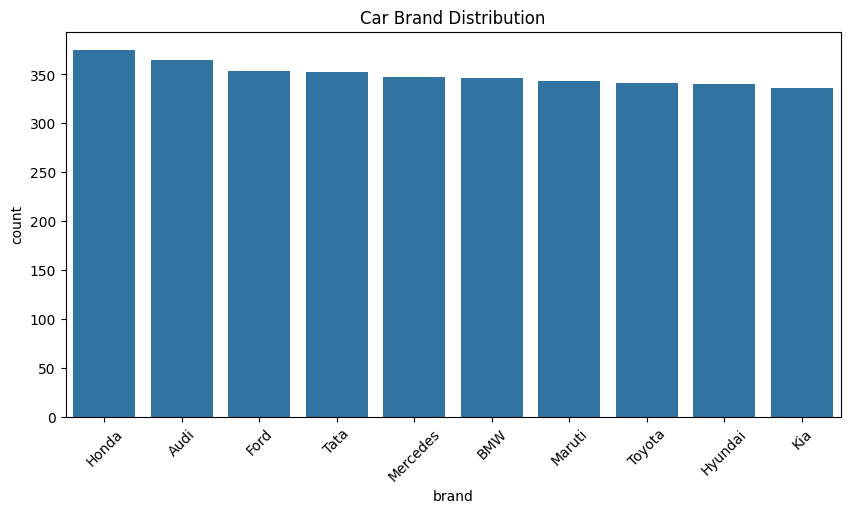

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Car Brand Distribution')
plt.xticks(rotation=45)
plt.show()

---
# Graph: Average Selling Price by Brand
---

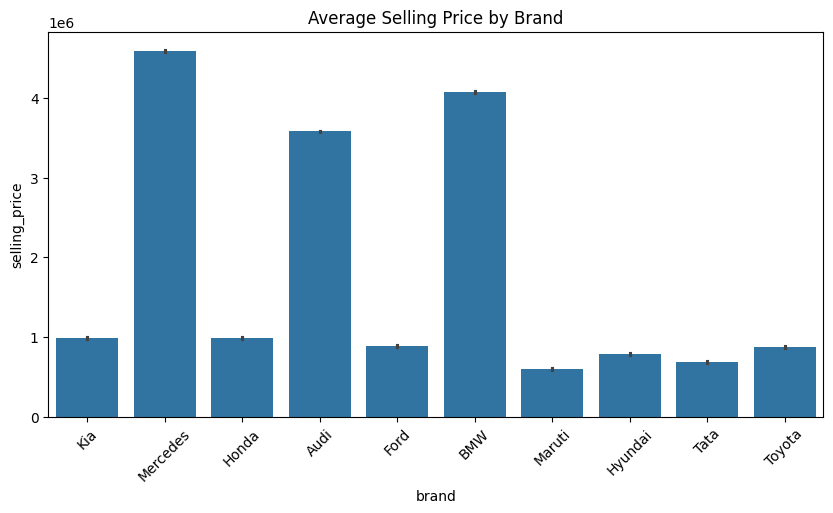

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='brand', y='selling_price', estimator='mean')
plt.title('Average Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()

---
# Graph: Price vs Year
---

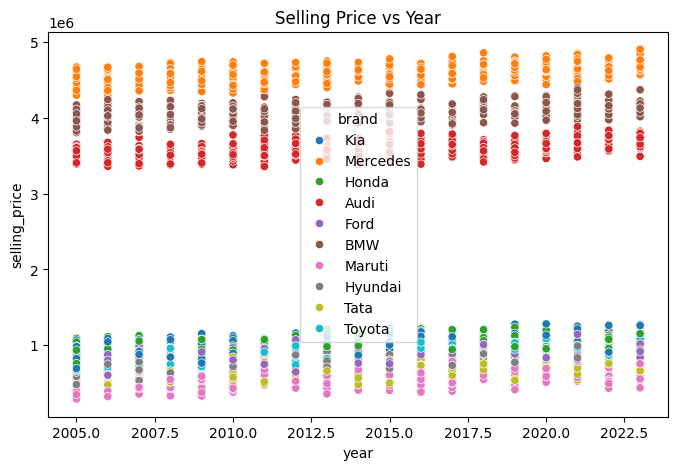

In [ ]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='year', y='selling_price', hue='brand')
plt.title('Selling Price vs Year')
plt.show()

---
# Graph: Transmission Type Distrubution
---

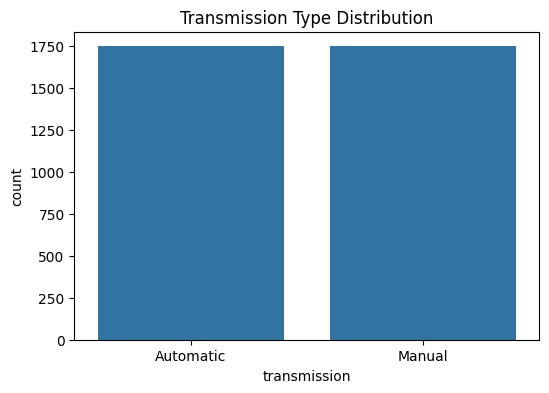

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='transmission')
plt.title('Transmission Type Distribution')
plt.show()

---
# Graph: Correlation Heatmap
---

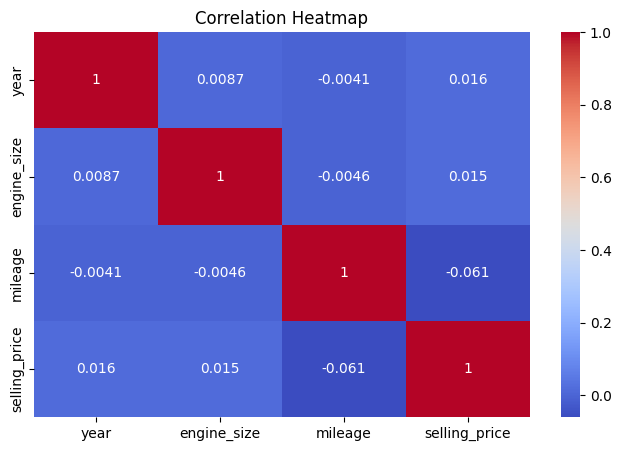

In [ ]:

plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

---
# Model Training and Evaluation
---
##Linear Regression:

R2 Score: 0.116

MAE: 1167756.09

RMSE: 1393062.72

##Random Forest Results:

R2 Score: 1.0

MAE: 19221.14

RMSE: 24555.0

---

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("📈 Linear Regression Results:")
print("R2 Score:", round(r2_score(y_test, y_pred_lr), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_lr), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 2))

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n🌳 Random Forest Results:")
print("R2 Score:", round(r2_score(y_test, y_pred_rf), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2))


📈 Linear Regression Results:
R2 Score: 0.116
MAE: 1167756.09
RMSE: 1393062.72

🌳 Random Forest Results:
R2 Score: 1.0
MAE: 19221.14
RMSE: 24555.0


---
# Graph: Actual Prices vs Predicted Prices
---

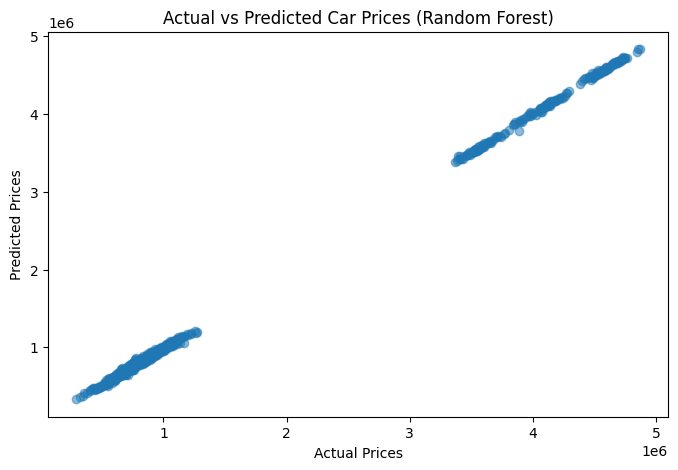

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()


In [ ]:
import joblib

# Save both models
joblib.dump(lr, 'linear_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')

print("✅ Models saved successfully as .pkl files")


✅ Models saved successfully as .pkl files



---
## 🏁 Final Takeaways
- Generated 3500+ synthetic car records with realistic pricing patterns.  
- Explored trends and correlations across 9+ features.  
- Compared Linear Regression and Random Forest models.  
- Random Forest achieved higher accuracy and lower error values.  

> 🚘 This project showcases data preprocessing, visualization, and predictive modeling in a complete ML pipeline.

---

